<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_01_Pandas Accessing Data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [37]:
!pip install -U datasets
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## 🟩 Select First 5 Rows with .iloc() (2.1.1)

In [4]:
df.iloc[0:5]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


---

## 🟩 Get Rows and Columns with .loc() (2.1.2)

In [10]:
df.loc[0:5,'job_title_short':'job_posted_date']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59


---

## 🟨 First 15 Rows in US (2.1.3)

In [14]:
df.loc[0:15,'job_location']=='United States'

,job_location
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


---

## 🟥 Filter by Date (2.1.4)

In [20]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_posted_date']

,job_posted_date
0,2023-06-16 13:44:15
1,2023-01-14 13:18:07
2,2023-10-10 13:14:55
3,2023-07-04 13:01:41
4,2023-08-07 14:29:36
...,...
785736,2023-03-13 06:16:16
785737,2023-03-12 06:18:18
785738,2023-03-12 06:32:36
785739,2023-03-12 06:32:15


In [29]:
df['month']=df['job_posted_date'].dt.month
df['month']
values = df.groupby('month')['job_title_short'].value_counts()
values_df = values.reset_index(name='count')

In [30]:
values_df

,month,job_title_short,count
0,1,Data Analyst,23585
1,1,Data Engineer,21419
2,1,Data Scientist,20760
3,1,Software Engineer,5122
4,1,Senior Data Engineer,5041
...,...,...,...
115,12,Senior Data Engineer,2878
116,12,Senior Data Scientist,2431
117,12,Senior Data Analyst,1799
118,12,Machine Learning Engineer,1254


In [33]:
jobs_avail = values_df.pivot_table(index='month',columns='job_title_short',values='count')
jobs_avail

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
month,,,,,,,,,,
1,4874.0,1295.0,23585.0,21419.0,20760.0,1386.0,3696.0,5041.0,4644.0,5122.0
2,3454.0,843.0,16558.0,15899.0,13951.0,1046.0,2713.0,3756.0,2994.0,3364.0
3,3393.0,883.0,16243.0,16093.0,13569.0,1065.0,2454.0,3705.0,2987.0,3692.0
4,4246.0,1051.0,15514.0,14891.0,13513.0,990.0,2351.0,3572.0,2766.0,4025.0
5,2408.0,480.0,13423.0,13646.0,11745.0,811.0,1925.0,3298.0,2399.0,1969.0
6,3413.0,714.0,16008.0,15501.0,13615.0,1048.0,2319.0,3809.0,2932.0,2213.0
7,3850.0,1059.0,16095.0,14518.0,14177.0,1174.0,2380.0,3744.0,3117.0,3663.0
8,5189.0,1378.0,18628.0,15622.0,16984.0,1360.0,2951.0,4025.0,4055.0,4970.0
9,4447.0,1022.0,14969.0,14918.0,13577.0,1250.0,2194.0,3547.0,2936.0,3499.0


<Axes: xlabel='month'>

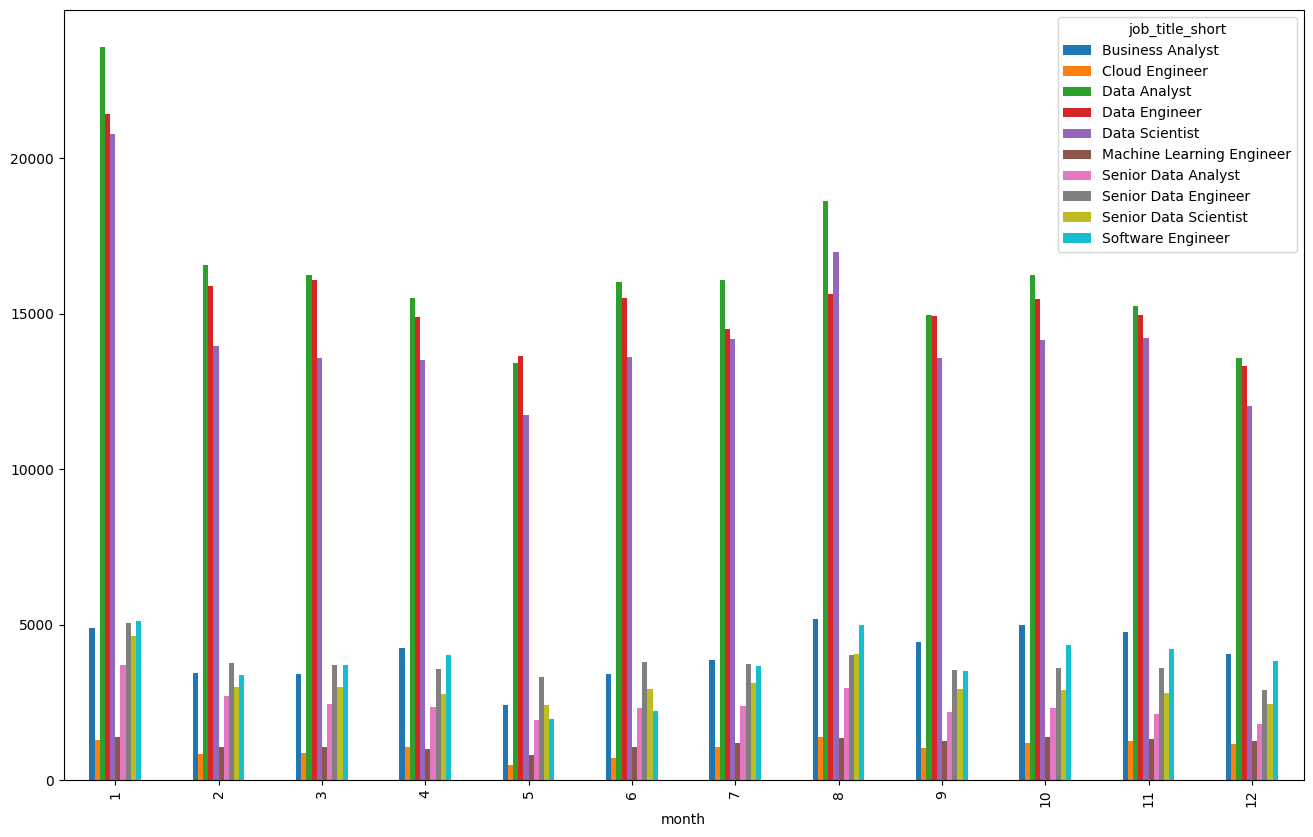

In [36]:
jobs_avail.plot(kind='bar',figsize=(16,10))

---